In [572]:
%run TDA/tda_filtrations.py 
%run TDA/tda_silhuoette.py

## Funciones en tda_filtrations.py:

Los dataset son array de 3 columnas: las dos primeras representan coordenadas de los vértices y la tercera el valor del gen.

Las función implementadas en tda_filtrations.py son:

- <u> Función **matrix_filtration:**</u>

      Input: Dataset y un carácter f que determinará el tipo de filtración que se defina a la triangulación de Dalaunay de los puntos del dataset.

      Si f = 'A' -> La filtración es:

        f(v) = 0 para todos los vértices;
        f(e) = |expr(u)-expr(v)| para cada arista e = (u,v);
        f(t) = valor máximo de las 3 aristas.

      Si f = 'B' -> La filtración es:

        f(v) = exp(v) para todos los vértices;
        f(e) = max{expr(u),expr(v)} para cada arista e = (u,v);
        f(t) = valor máximo de las 3 aristas.

      Output: Matriz M donde el elemento (i,j) es el valor de la filtración de la arista que une los vértices de las filas i y j, respectivamente, del dataset. El elemento (i,i) es el valor del filtro para el vértice i.

- <u>Función **filtration:**</u>

      Input: Matriz M de la función anterior.

      Output: Complejo de rips creado con gudhi asociado a la filtración definida en la matriz M.

- <u>Función **persistence_intervals:**</u>

      Input: Complejo obtenido con la función anterior.

      Output: Matrices H0 y H1 con los intervalos de persistencia de dimensiones 0 y 1, respectivamente.

## Funciones en tda_silhuoette.py:

En fichero se define todas las funciones relacionadas con la función silueta. 
Dada la matriz con los intervalos de persistencia $(b_i,d_i)$ para una dimensión, dicha función está definida de la siguiente forma:

$$sh(x) = \sqrt{2} \sum_i \frac{w_i}{\sum_j w_j} tent_i(x)$$

donde $w_i = (d_i-b_i)^2$ y $tent_i(x) = \max \{0, h-|x-c|\}$ siendo $h = \frac{d-b}{2}$ la altura del triángulo y $c = \frac{b+d}{2}$ el punto medio del intervalo.

*Nota: es la forma en que la define gudhi*

- <u>Función **silhuoette_point**:</u>
  
      Input: Matriz H con los intervalos de persistencia y un valor x.

      Output: sh(x)
<br>  

- <u>Función **silhuoette(res, Hs)**:</u>

      Input: Lista Hs donde Hs[t] es el array con los intervalos de persistencia del instante t. El argumento res indica la resolución.
  
      Output: Lista shs donde shs[t] es un array con los valores de la función silueta en los puntos de un soporte xs definido en el cuerpo de la función. Dicho soporte también se devuelve como salida.

<br>

- <u>Función **silhuoette_graphics(xs, shs, colores)**:</u>  Grafica las funciones silueta


- <u>Función **silhuoette_diff(xs, shs, norm)**:</u> Calcula, en cada uno de los puntos del soporte xs, la norma de la diferencia entre las funciones siluetas de dos instantes consecutivos.

In [577]:
def visualizar_dataset_2D(df:np.array, title:str = None):

    sc = plt.scatter(df[:,0], df[:,1], c = df[:,2], cmap = "plasma", edgecolors = "k", vmin = 0, vmax = 1)
    plt.title(title)
    cbar = plt.colorbar(sc)
    #cbar.set_label("Expresion")
    #plt.xlabel("X")
    #plt.ylabel("Y")


# Ejemplo toy:

Ejemplo con 4 puntos de coordenadas $(0,0)$, $(1,0)$, $(0.2,0.8)$ y $(1,1)$ cuyos valores de gen son $0$, $0.5$, $0.25$ y $0$, respectivamente. 

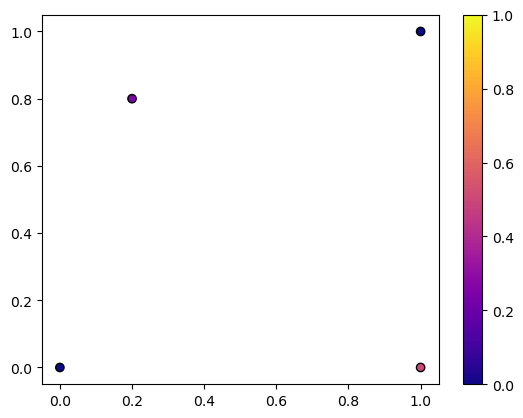

In [580]:
dataset = np.array([[0, 0, 0], [1, 0, 0.5], [0.2, 0.8, 0.25], [1, 1, 0]])
visualizar_dataset_2D(dataset)

Calculamos las matrices correspondientes a las filtraciones:

In [582]:
M_diff = matrix_filtration(dataset, 'A')
print(M_diff)

[[0.   0.5  0.25  inf]
 [0.5  0.   0.25 0.5 ]
 [0.25 0.25 0.   0.25]
 [ inf 0.5  0.25 0.  ]]


In [583]:
M_max= matrix_filtration(dataset, 'B')
print(M_max)

[[0.   0.5  0.25  inf]
 [0.5  0.5  0.5  0.5 ]
 [0.25 0.5  0.25 0.25]
 [ inf 0.5  0.25 0.  ]]


In [584]:
simplex_tree_diff = filtration(M_diff)

for s in simplex_tree_diff.get_filtration():
    print(s)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([0, 2], 0.25)
([1, 2], 0.25)
([2, 3], 0.25)
([0, 1], 0.5)
([0, 1, 2], 0.5)
([1, 3], 0.5)
([1, 2, 3], 0.5)


In [585]:
H0_diff, H1_diff = persistence_intervals(simplex_tree_diff)

In [586]:
H0_diff, H1_diff

(array([[0.  , 0.25],
        [0.  , 0.25],
        [0.  , 0.25],
        [0.  ,  inf]]),
 array([], shape=(0, 2), dtype=float64))

In [587]:
simplex_tree_max = filtration(M_max)
H0_max, H1_max = persistence_intervals(simplex_tree_max)

In [588]:
for s in simplex_tree_max.get_filtration():
    print(s)

([0], 0.0)
([3], 0.0)
([2], 0.25)
([0, 2], 0.25)
([2, 3], 0.25)
([1], 0.5)
([0, 1], 0.5)
([1, 2], 0.5)
([0, 1, 2], 0.5)
([1, 3], 0.5)
([1, 2, 3], 0.5)


In [589]:
H0_max, H1_max

(array([[0.  , 0.25],
        [0.  ,  inf]]),
 array([], shape=(0, 2), dtype=float64))

# Ejemplo con un dataset de células:

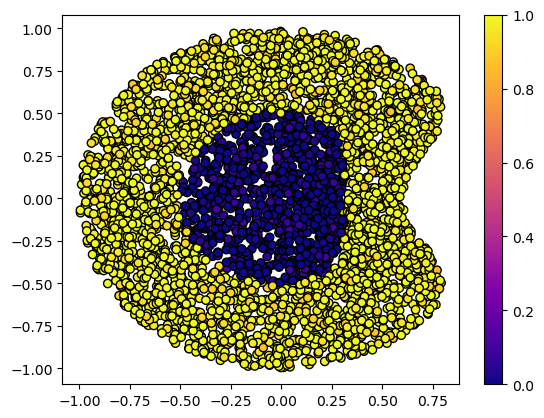

In [661]:
dataset = np.loadtxt('Experimentos_BELEN/Prueba0/invag1Bajo_grande_Anillos1.csv', delimiter = ',', skiprows = 1)
visualizar_dataset_2D (dataset)

In [592]:
M = matrix_filtration(dataset, 'B') 
max_edge = np.max(M[M < np.inf]) #calculamos el máximo valor para sustituir las muertes +inf por max_edge + 1

In [593]:
simplex_tree = filtration(M)
H0, H1 = persistence_intervals(simplex_tree)
H0 = np.where(np.isinf(H0), max_edge + 1, H0)
H1 = np.where(np.isinf(H1), max_edge + 1, H1)

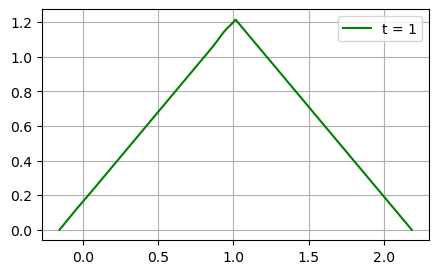

In [594]:
res = 1000
xs0, shs0 = silhuoette(res, [H0])
plt.figure(figsize = (5,3))
silhuoette_graphics(xs0, shs0, colores = ['green'])

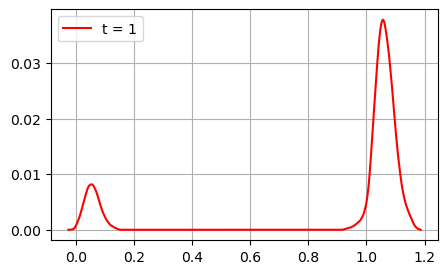

In [595]:
xs1, shs1 = silhuoette(res, [H1])
plt.figure(figsize = (5,3))
silhuoette_graphics(xs1, shs1, colores = ['red'])

# Experimento 1:

In [597]:
dataset = []

for i in range(12):
    dt = np.loadtxt('Experimentos_BELEN/Experimento1/datasets/dataset'+str(i)+'.csv', delimiter = ',', skiprows = 1)
    dataset.append(dt)

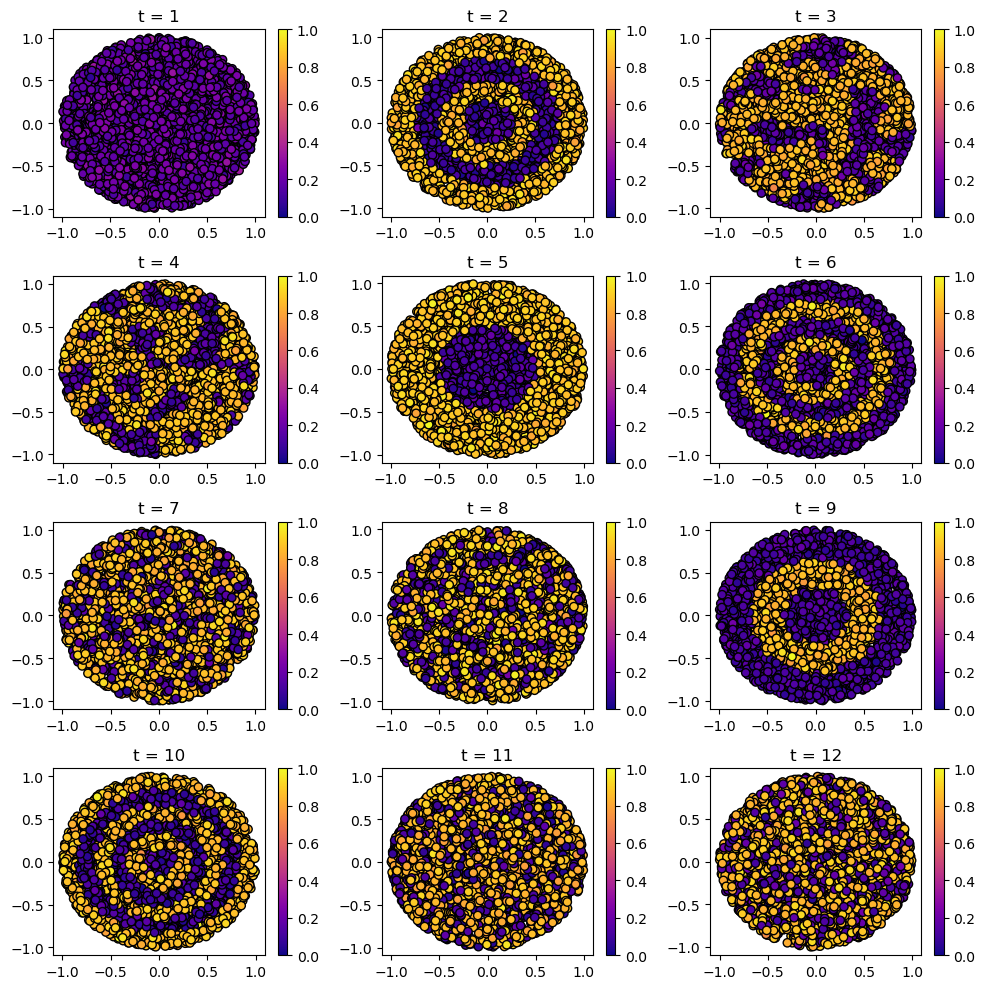

In [598]:
fig, axes = plt.subplots(4, 3, figsize = (10,10))

for t, (dt, ax) in enumerate(zip(dataset, axes.flatten()), start = 1):
    plt.sca(ax)                     
    visualizar_dataset_2D(dt, title = f"t = {t}")     
    
plt.tight_layout()

plt.savefig("Experimentos_BELEN/Experimento1/datasets.png")

plt.show()

In [599]:
F = 'B'
Ms = []
maxs_edge = []

for dt in dataset:
    M = matrix_filtration(dt, F)
    Ms.append(M)
    max_edge = np.max(M[M < np.inf])
    maxs_edge.append(max_edge)

In [600]:
H0s = []
H1s = []

for M,m in zip(Ms,maxs_edge):

    simplex_tree = filtration(M)
    H0, H1 = persistence_intervals(simplex_tree)
    H0 = np.where(np.isinf(H0), m + 1, H0)
    H1 = np.where(np.isinf(H1), m + 1, H1)
    H0s.append(H0)
    H1s.append(H1)

In [601]:
res = 1000
xs0, shs0 = silhuoette(res, H0s)

In [602]:
xs1, shs1 = silhuoette(res, H1s)

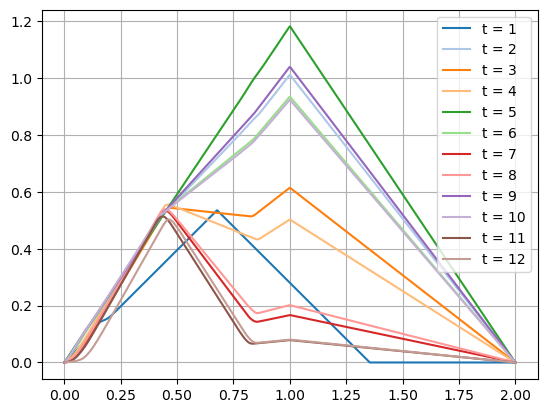

In [603]:
colores = plt.get_cmap('tab20').colors
silhuoette_graphics(xs0, shs0, colores)
plt.savefig("Experimentos_BELEN/Experimento1/silueta_dim0.png")
plt.show()

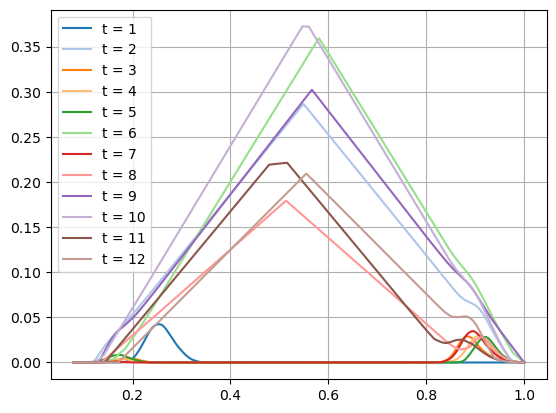

In [604]:
silhuoette_graphics(xs1, shs1, colores)
plt.savefig("Experimentos_BELEN/Experimento1/silueta_dim1.png")
plt.show()

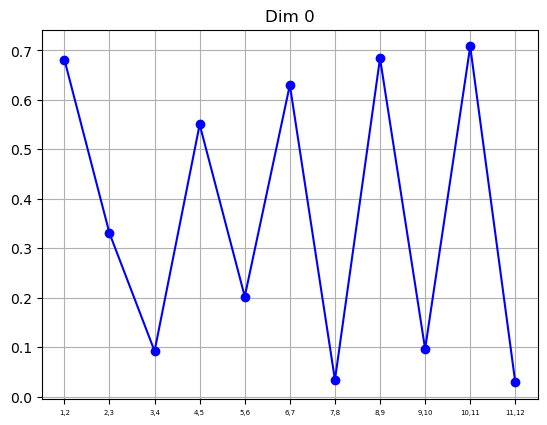

In [605]:
d_0, txt = silhuoette_diff(xs0, shs0, 'L1')

x = list(range(0, len(txt)))
plt.plot(x, d_0, marker = 'o', linestyle = '-', color = 'blue')
plt.xticks(x, txt, fontsize = 5)
plt.grid(True)
plt.title('Dim 0')

plt.savefig("Experimentos_BELEN/Experimento1/diff_L1_dim0.png")

plt.show()

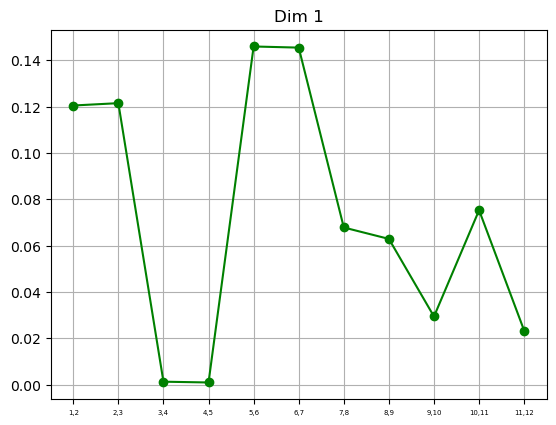

In [606]:
d_1, txt = silhuoette_diff(xs1, shs1, 'L1')

x = list(range(0, len(txt)))
plt.plot(x, d_1, marker = 'o', linestyle = '-', color = 'green')
plt.xticks(x, txt, fontsize = 5)
plt.grid(True)
plt.title('Dim 1')

plt.savefig("Experimentos_BELEN/Experimento1/diff_L1_dim1.png")

plt.show()

# Experimento 2:

In [608]:
dataset = []

import os
files = os.listdir('Experimentos_BELEN/Experimento2/datasets')

for i in range(len(files)):
    dt = np.loadtxt('Experimentos_BELEN/Experimento2/datasets/' + files[i], delimiter = ',', skiprows = 1)
    dataset.append(dt)

In [609]:
files

['1circular_uniforme.csv',
 '2circular_perlinBajo.csv',
 '3circular_perlinMedio.csv',
 '4circular_perlinAlto.csv',
 '5circular_Anillos1.csv',
 '6circular_Anillos2.csv',
 '7circular_Anillos3.csv']

In [610]:
points1 = dataset[0][:,:-1]
expr1 = dataset[0][:,-1]

points2 = dataset[1][:,:-1]
expr2 = dataset[1][:,-1]

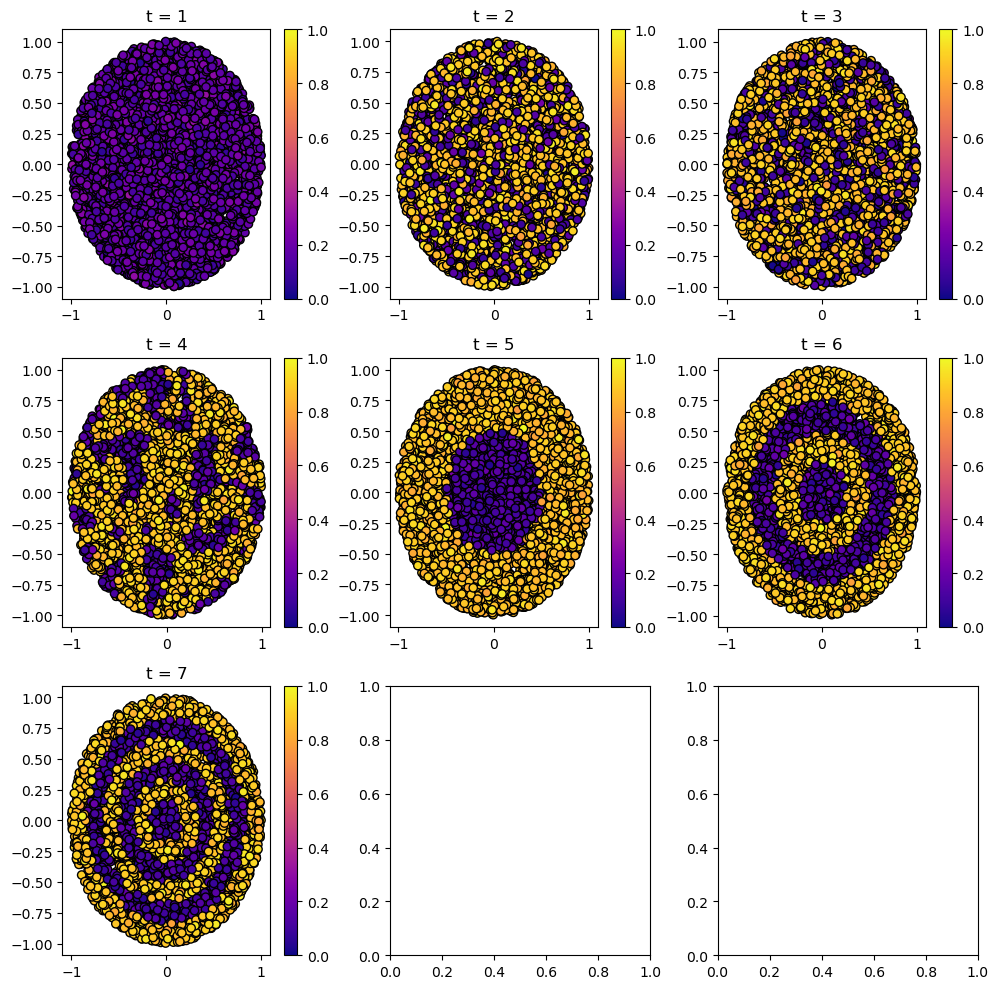

In [611]:
fig, axes = plt.subplots(3, 3, figsize = (10,10))

for t, (dt, ax) in enumerate(zip(dataset, axes.flatten()), start = 1):
    plt.sca(ax)                     
    visualizar_dataset_2D(dt, title = f"t = {t}")     
    
plt.tight_layout()

plt.savefig("Experimentos_BELEN/Experimento2/datasets.png")

plt.show()

In [612]:
F = 'B'
Ms = []
maxs_edge = []

for dt in dataset:
    M = matrix_filtration(dt, F)
    Ms.append(M)
    max_edge = np.max(M[M < np.inf])
    maxs_edge.append(max_edge)

In [613]:
H0s = []
H1s = []

for M,m in zip(Ms,maxs_edge):

    simplex_tree = filtration(M)
    H0, H1 = persistence_intervals(simplex_tree)
    H0 = np.where(np.isinf(H0), m + 1, H0)
    H1 = np.where(np.isinf(H1), m + 1, H1)
    H0s.append(H0)
    H1s.append(H1)

In [614]:
res = 1000
xs0, shs0 = silhuoette(res, H0s)

In [615]:
xs1, shs1 = silhuoette(res, H1s)

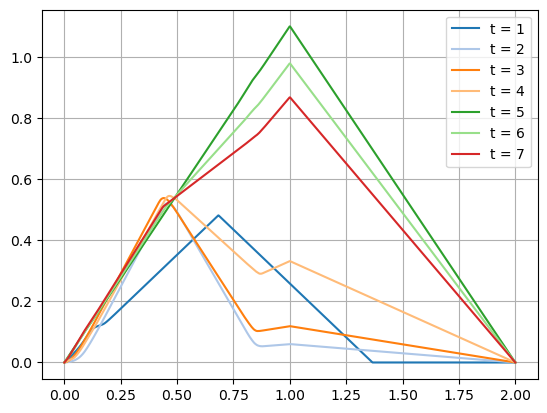

In [616]:
silhuoette_graphics(xs0, shs0, colores)
plt.savefig("Experimentos_BELEN/Experimento2/silueta_dim0.png")
plt.show()

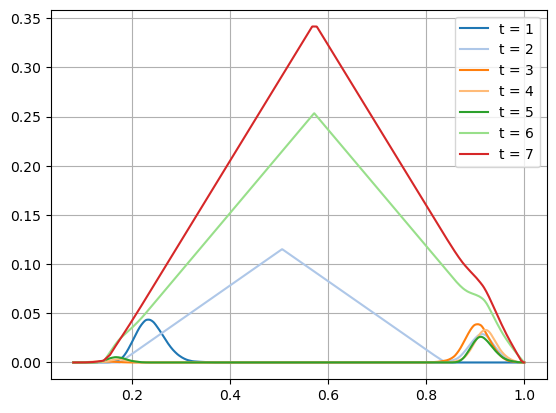

In [617]:
silhuoette_graphics(xs1, shs1, colores)
plt.savefig("Experimentos_BELEN/Experimento2/silueta_dim1.png")
plt.show()

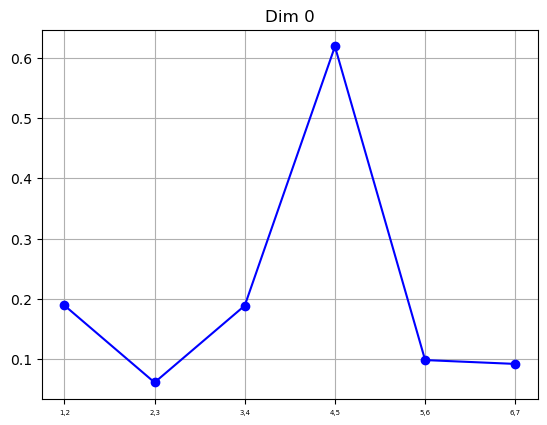

In [618]:
d_0, txt = silhuoette_diff(xs0, shs0, 'L1')

x = list(range(0, len(txt)))
plt.plot(x, d_0, marker = 'o', linestyle = '-', color = 'blue')
plt.xticks(x, txt, fontsize = 5)
plt.grid(True)
plt.title('Dim 0')

plt.savefig("Experimentos_BELEN/Experimento2/diff_L1_dim0.png")

plt.show()

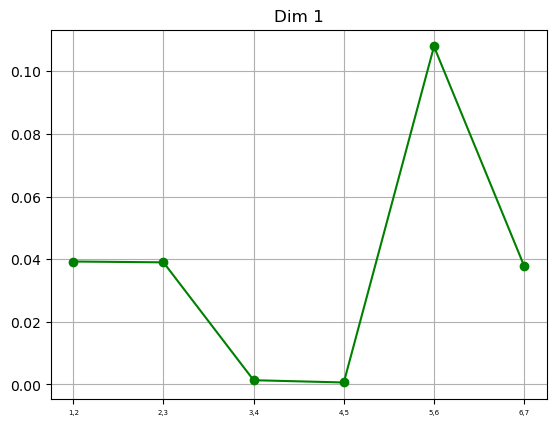

In [619]:
d_1, txt = silhuoette_diff(xs1, shs1, 'L1')

x = list(range(0, len(txt)))
plt.plot(x, d_1, marker = 'o', linestyle = '-', color = 'green')
plt.xticks(x, txt, fontsize = 5)
plt.grid(True)
plt.title('Dim 1')

plt.savefig("Experimentos_BELEN/Experimento2/diff_L1_dim1.png")

plt.show()